# Billboard Top 100

In [91]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part A

In [87]:
df = pd.read_csv('billboard.csv')
dfa = df[['performer', 'song', 'instance']]
dfa = dfa.groupby(['performer', 'song']).agg({'instance' : 'count'}).sort_values(by = 'instance', ascending = False)
dfa = dfa.reset_index()
dfa = dfa.rename(columns={'instance' : 'count'})
dfa[:10]

,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,The Weeknd,Blinding Lights,76
3,Jason Mraz,I'm Yours,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Jewel,Foolish Games/You Were Meant For Me,65
8,Adele,Rolling In The Deep,65
9,Carrie Underwood,Before He Cheats,64


## Part B

In [89]:
dfb = df[['song', 'year']]
dfb = dfb[(dfb['year'] != 1958) & (dfb['year'] != 2021)]
dfb = dfb.drop_duplicates()
dfb = dfb.groupby('year').agg({'song' : "count"}).reset_index()
dfb = dfb.rename(columns = {'song' : 'unique songs'})
dfb[:5]

,year,unique songs
0,1959,641
1,1960,668
2,1961,747
3,1962,748
4,1963,739


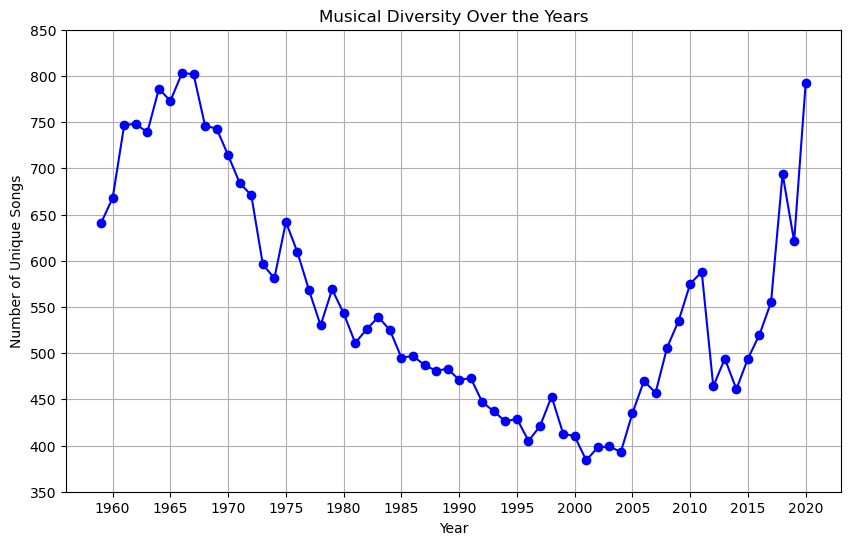

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(dfb['year'], dfb['unique songs'], marker='o', linestyle='-', color='b')
plt.title('Musical Diversity Over the Years')
plt.xticks(ticks=range(1960, dfb['year'].max() + 1, 5))
plt.yticks(ticks=range(350, 850 + 50, 50))
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()

## Part C

In [101]:
dfc = df[['performer', 'song', 'instance']]
dfc = dfc.groupby(['performer', 'song']).agg({'instance' : 'count'}).reset_index()
dfc = dfc[dfc['instance'] >= 10]
dfc = dfc.groupby('performer').agg({'song' : 'count'})
dfc = dfc[dfc['song'] >= 30]
dfc = dfc.reset_index().sort_values(by='song', ascending = False)
dfc

,performer,song
5,Elton John,52
10,Madonna,44
9,Kenny Chesney,42
18,Tim McGraw,39
8,Keith Urban,36
15,Stevie Wonder,36
16,Taylor Swift,35
11,Michael Jackson,34
14,Rod Stewart,33
17,The Rolling Stones,33


C:\Users\linds\AppData\Local\Temp\ipykernel_7172\3687864860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song', y='performer', data=dfc, palette='viridis', alpha = 1, zorder = 3)


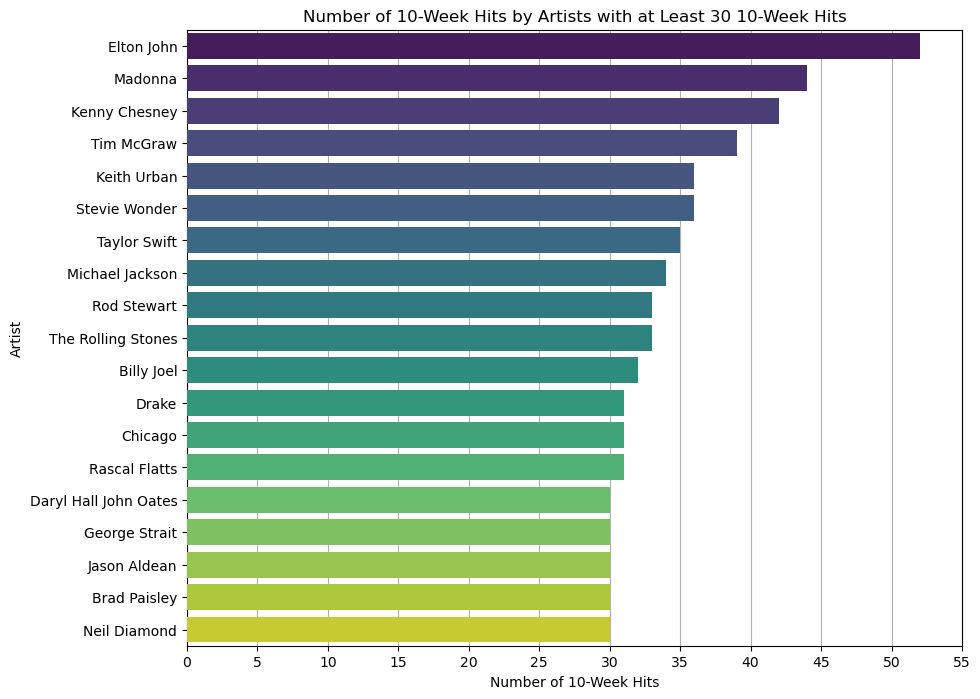

In [131]:
plt.figure(figsize=(10, 8))
sns.barplot(x='song', y='performer', data=dfc, palette='viridis', alpha = 1, zorder = 3)

plt.title('Number of 10-Week Hits by Artists with at Least 30 10-Week Hits')
plt.xlabel('Number of 10-Week Hits')
plt.ylabel('Artist')
plt.xticks(ticks=range(0, dfc['song'].max() + 5, 5))
plt.grid(True, axis = 'x', zorder = 0)
plt.show()